<a href="https://colab.research.google.com/github/KoreDare/Python_Bootcamp/blob/main/Python_Real_life_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dirty_sales_data.csv')

In [5]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Category,Sales_Amount,Payment_Method
0,32,CUST244,2023-03-11,Electronics,474.55,crypto
1,110,CUST15,2022-01-02,Furniture,491.05,crypto
2,137,CUST28,2022-03-22,Clothing,654.17,Mobile Pay
3,89,CUST135,2022-07-01,Furniture,537.91,Mobile Pay
4,919,CUST173,2023-04-11,Electronics,242.84,Credit Card


In [8]:
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,3
Transaction_Date,81
Category,188
Sales_Amount,0
Payment_Method,194


In [16]:
df['Sales_Amount'] = pd.to_numeric(df['Sales_Amount'], errors='coerce') # To change negative to 0

In [17]:
df['Category'].fillna('Unknown', inplace=True)  # To fill the empty Category with 'Unknown'

<ipython-input-17-5384e853fb18>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna('Unknown', inplace=True)


In [18]:
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True) # To fill the empty Payment_Method with the most common payment method

<ipython-input-18-b6ef006aba43>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment_Method'].fillna(df['Payment_Method'].mode()[0], inplace=True)


In [19]:
df.dropna(subset=['Customer_ID'], inplace=True) # To drop the column 'Customer_ID'

In [20]:
df.duplicated().sum()   # To check for the total number of duplicated entries

30

In [22]:
df.drop_duplicates(inplace=True)  # To drop the duplicate entries

In [23]:
df.head(10)

,Transaction_ID,Customer_ID,Transaction_Date,Category,Sales_Amount,Payment_Method
0,32,CUST244,2023-03-11,Electronics,474.55,crypto
1,110,CUST15,2022-01-02,Furniture,491.05,crypto
2,137,CUST28,2022-03-22,Clothing,654.17,Mobile Pay
3,89,CUST135,2022-07-01,Furniture,537.91,Mobile Pay
4,919,CUST173,2023-04-11,Electronics,242.84,Credit Card
5,26,CUST188,NaN,Clothing,577.69,Credit Card
6,871,CUST296,2022-05-23,Furniture,675.18,Cash
7,319,CUST264,2022-10-15,Beauty,380.96,Credit Card
8,262,CUST27,2022-05-09,Unknown,511.72,Cash
9,536,CUST242,2023-04-08,Groceries,613.74,Credit Card


In [24]:
df.dtypes

,0
Transaction_ID,int64
Customer_ID,object
Transaction_Date,object
Category,object
Sales_Amount,float64
Payment_Method,object


In [28]:
# df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Transaction_Date'].fillna(df['Transaction_Date'].median(), inplace=True)

<ipython-input-28-b86f832c5c6f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction_Date'].fillna(df['Transaction_Date'].median(), inplace=True)


In [29]:
df.dtypes

,0
Transaction_ID,int64
Customer_ID,object
Transaction_Date,datetime64[ns]
Category,object
Sales_Amount,float64
Payment_Method,object


In [30]:
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Transaction_Date,0
Category,0
Sales_Amount,0
Payment_Method,0


SALES BY CATEGORY

In [32]:
Sales_By_Category = df.groupby('Category')['Sales_Amount'].sum()
Sales_By_Category

,Sales_Amount
Category,
Beauty,21369.32
Clothing,46422.13
Electronics,51435.63
Furniture,51569.29
Groceries,54613.09
Unknown,66906.80


SALES PER CATEGORY

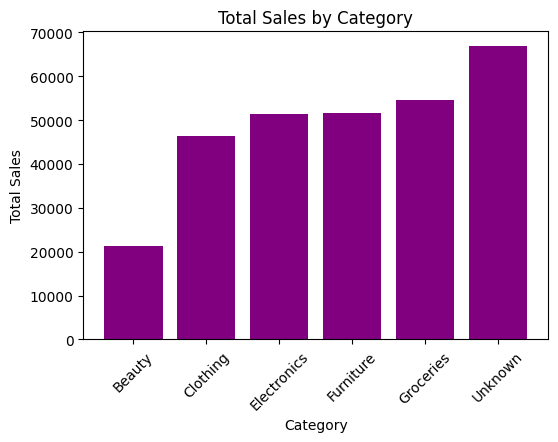

In [81]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(Sales_By_Category.index, Sales_By_Category.values, color='purple')
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

In [38]:
df['Trans_Month'] = df['Transaction_Date'].dt.strftime('%B-%y')
# df['Trans_Month'] = df['Transaction_Date'].dt.strftime('%y-%m')

In [39]:
df.head()

,Transaction_ID,Customer_ID,Transaction_Date,Category,Sales_Amount,Payment_Method,Trans_Month
0,32,CUST244,2023-03-11,Electronics,474.55,crypto,March-23
1,110,CUST15,2022-01-02,Furniture,491.05,crypto,January-22
2,137,CUST28,2022-03-22,Clothing,654.17,Mobile Pay,March-22
3,89,CUST135,2022-07-01,Furniture,537.91,Mobile Pay,July-22
4,919,CUST173,2023-04-11,Electronics,242.84,Credit Card,April-23


In [40]:
Sales_By_Month = df.groupby('Trans_Month')['Sales_Amount'].sum()
Sales_By_Month

,Sales_Amount
Trans_Month,
April-22,18522.70
April-23,29916.98
August-22,21770.86
December-22,24625.49
February-22,15529.10
February-23,25140.39
January-22,12280.24
January-23,5927.83
July-22,-20587.19


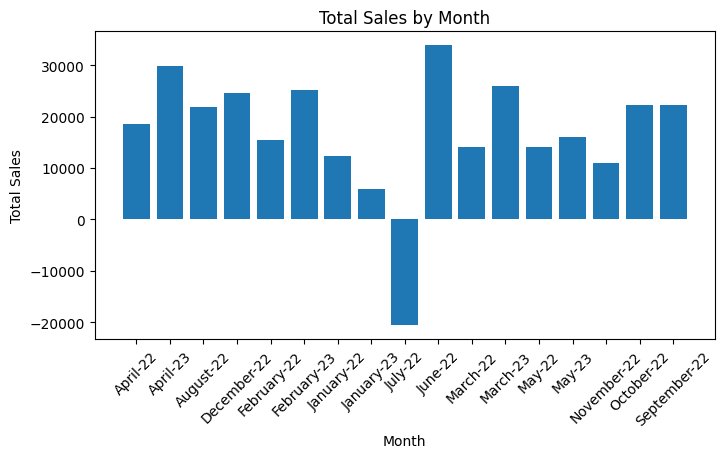

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(Sales_By_Month.index, Sales_By_Month.values)
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()

In [57]:
df['Month'] = df['Transaction_Date'].dt.to_period('M')
df = df[(df['Sales_Amount']>0)]
df

,Transaction_ID,Customer_ID,Transaction_Date,Category,Sales_Amount,Payment_Method,Trans_Month,Month
0,32,CUST244,2023-03-11,Electronics,474.55,crypto,March-23,2023-03
1,110,CUST15,2022-01-02,Furniture,491.05,crypto,January-22,2022-01
2,137,CUST28,2022-03-22,Clothing,654.17,Mobile Pay,March-22,2022-03
3,89,CUST135,2022-07-01,Furniture,537.91,Mobile Pay,July-22,2022-07
4,919,CUST173,2023-04-11,Electronics,242.84,Credit Card,April-23,2023-04
...,...,...,...,...,...,...,...,...
1024,872,CUST295,2023-04-27,Unknown,406.67,Cash,April-23,2023-04
1025,88,CUST28,2022-06-14,Electronics,741.30,crypto,June-22,2022-06
1026,331,CUST150,2022-12-01,Beauty,532.64,Cash,December-22,2022-12
1028,122,CUST171,2022-01-20,Clothing,649.81,crypto,January-22,2022-01


In [58]:
Sales_By_Month = df.groupby('Month')['Sales_Amount'].sum()
Sales_By_Month

,Sales_Amount
Month,
2022-01,32280.24
2022-02,25558.92
2022-03,24047.95
2022-04,23522.70
2022-05,19019.81
2022-06,33836.72
2022-07,19412.81
2022-08,31770.86
2022-09,57294.87


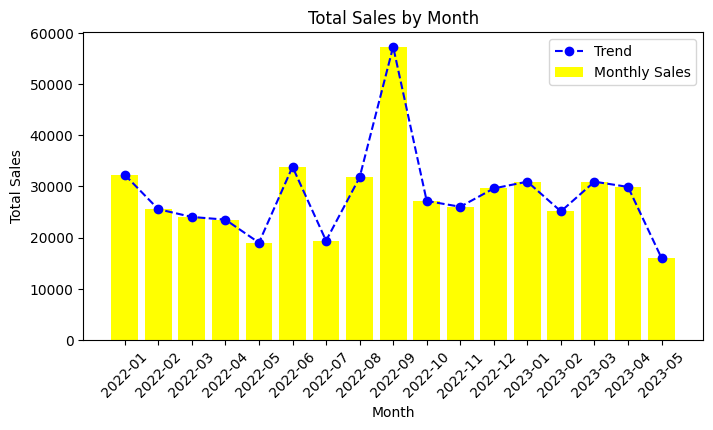

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(Sales_By_Month.index.astype(str), Sales_By_Month.values, color='yellow', label='Monthly Sales')
ax.plot(Sales_By_Month.index.astype(str), Sales_By_Month.values, marker='o', color='blue', linestyle='--', label='Trend')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month')
ax.legend()
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Sales Amount')

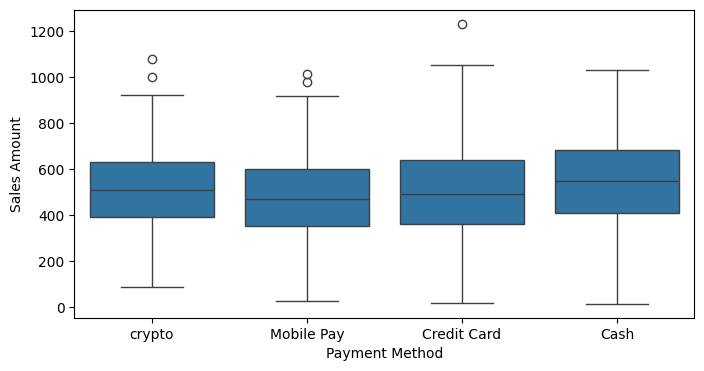

In [61]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(x='Payment_Method', y='Sales_Amount', data=df)
plt.xlabel('Payment Method')
plt.ylabel('Sales Amount')


In [63]:
cf = pd.read_csv('business_sales_data.csv')

In [64]:
cf.head()

,Marketing Spend,Customer Traffic,Discount Rate,Sales
0,1360,256,0.340353,3975
1,4272,64,0.265467,7102
2,3592,907,0.223892,18568
3,966,603,0.276447,2816
4,4926,941,0.296348,1569


In [65]:
cf.isnull().sum()

,0
Marketing Spend,0
Customer Traffic,0
Discount Rate,0
Sales,0


In [67]:
cf.describe()

,Marketing Spend,Customer Traffic,Discount Rate,Sales
count,100.000000,100.000000,100.000000,100.000000
mean,2669.940000,535.130000,0.282630,10586.050000
std,1276.786321,241.438561,0.136516,5399.563485
min,534.000000,51.000000,0.009038,1569.000000
25%,1519.750000,314.750000,0.172094,6077.750000
50%,2820.500000,566.500000,0.276415,10319.500000
75%,3616.000000,727.250000,0.402365,14649.500000
max,4993.000000,949.000000,0.498127,19525.000000


In [69]:
cf.dtypes

,0
Marketing Spend,int64
Customer Traffic,int64
Discount Rate,float64
Sales,int64


In [66]:
cf.duplicated().sum()

0

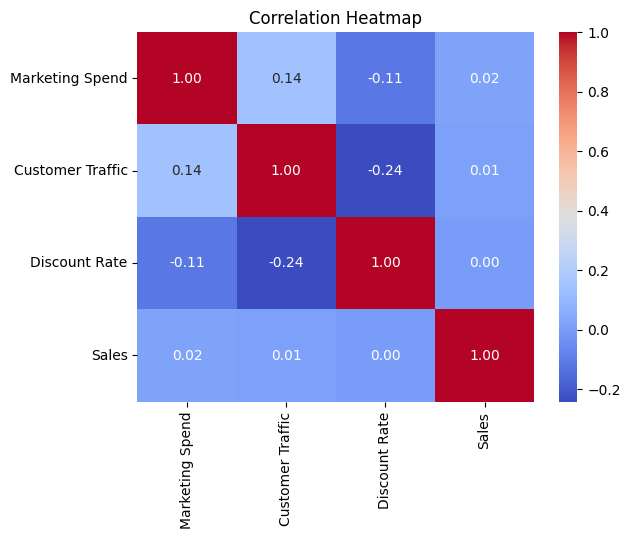

In [73]:
import seaborn as sns

corr_matrix = cf.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()